In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_excel('IMDB Dataset.xlsx')

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [5]:
df.duplicated().sum()

418

In [6]:
df=df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(49582, 2)

<BarContainer object of 2 artists>

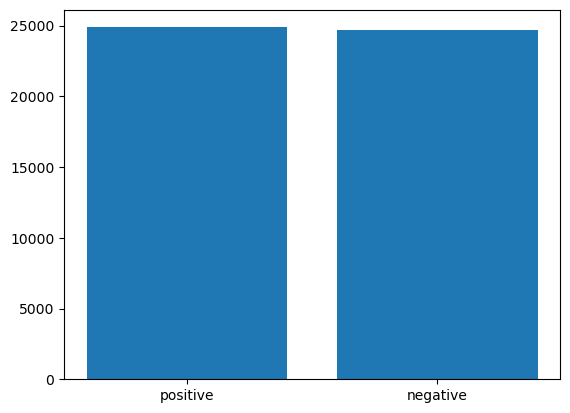

In [9]:
plt.bar(x=df['sentiment'].unique(),height=df['sentiment'].value_counts())

In [10]:
df['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

In [11]:
df1=pd.DataFrame()

In [12]:
df1['word_count']=df['review'].apply(lambda x: len(str(x).split()))

In [13]:
df1

,word_count
0,307
1,162
2,166
3,138
4,230
...,...
49995,194
49996,112
49997,230
49998,212


In [14]:
df1['unique_word_count']=df['review'].apply(lambda x: len(set(str(x).split())))

In [15]:
df1

,word_count,unique_word_count
0,307,208
1,162,114
2,166,121
3,138,96
4,230,152
...,...,...
49995,194,127
49996,112,85
49997,230,148
49998,212,154


In [16]:
from wordcloud import STOPWORDS

In [17]:
df1['stop_words_count']=df['review'].apply(lambda x: len([a for a in str(x).lower().split() if a in STOPWORDS]))

In [18]:
df1

,word_count,unique_word_count,stop_words_count
0,307,208,137
1,162,114,66
2,166,121,78
3,138,96,65
4,230,152,96
...,...,...,...
49995,194,127,104
49996,112,85,53
49997,230,148,112
49998,212,154,100


In [19]:
df1['url_counts']=df['review'].apply(lambda x : len([a for a in str(x).lower().split() if 'http' in a or 'https' in a or 'www' in a or '.com' in a]))

In [20]:
df1

,word_count,unique_word_count,stop_words_count,url_counts
0,307,208,137,0
1,162,114,66,0
2,166,121,78,0
3,138,96,65,0
4,230,152,96,0
...,...,...,...,...
49995,194,127,104,0
49996,112,85,53,0
49997,230,148,112,0
49998,212,154,100,0


In [21]:
df1['mean_word_length']=df['review'].apply(lambda x: np.mean([len(a) for a in str(x).lower().split()]))

In [22]:
df1

,word_count,unique_word_count,stop_words_count,url_counts,mean_word_length
0,307,208,137,0,4.739414
1,162,114,66,0,5.166667
2,166,121,78,0,4.584337
3,138,96,65,0,4.427536
4,230,152,96,0,4.730435
...,...,...,...,...,...
49995,194,127,104,0,4.201031
49996,112,85,53,0,4.741071
49997,230,148,112,0,4.569565
49998,212,154,100,0,4.825472


In [23]:
df1['sentiment']=df['sentiment']

In [24]:
df1

,word_count,unique_word_count,stop_words_count,url_counts,mean_word_length,sentiment
0,307,208,137,0,4.739414,positive
1,162,114,66,0,5.166667,positive
2,166,121,78,0,4.584337,positive
3,138,96,65,0,4.427536,negative
4,230,152,96,0,4.730435,positive
...,...,...,...,...,...,...
49995,194,127,104,0,4.201031,positive
49996,112,85,53,0,4.741071,negative
49997,230,148,112,0,4.569565,negative
49998,212,154,100,0,4.825472,negative


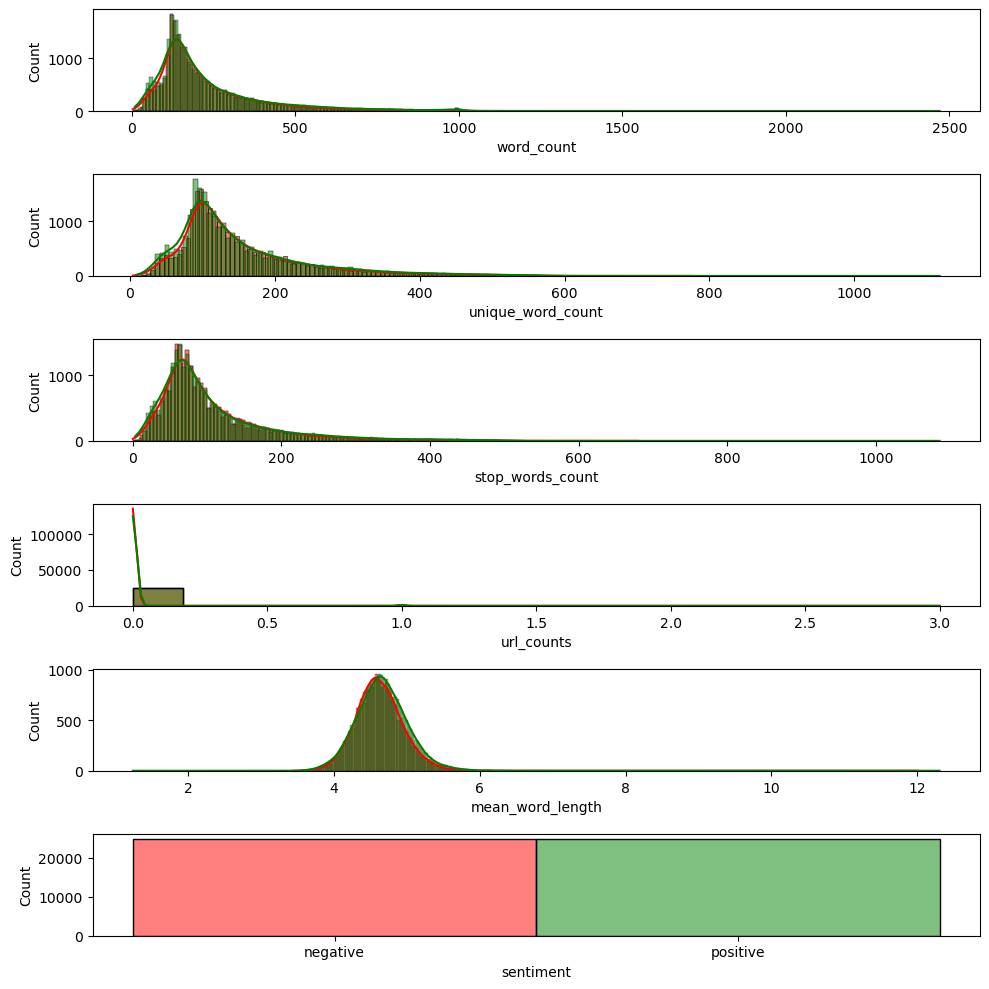

In [25]:
fig, axes = plt.subplots(nrows=len(df1.columns),figsize=(10,10),dpi=100)
pos=df['sentiment']=='positive'
for i, feature in enumerate(df1.columns):
    sns.histplot(df1.loc[~pos, feature],label='Negative',ax=axes[i],color='red',kde=True)
    sns.histplot(df1.loc[pos, feature],label='Positive',ax=axes[i],color='green',kde=True)

plt.tight_layout()
plt.show()

In [26]:
import tensorflow as tf 
import spacy
from bs4 import BeautifulSoup
from textblob import TextBlob
import emoji
from nltk.stem import WordNetLemmatizer
import string
import re
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import catboost
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

In [27]:
nlp = spacy.load("en_core_web_sm")

In [28]:
doc=pd.DataFrame()

In [29]:
from tqdm import tqdm
tqdm.pandas()

In [30]:
doc['text']=df['review'].progress_apply(lambda x : nlp(x))

100%|██████████████████████████████████████████████████████████████████████████| 49582/49582 [1:05:57<00:00, 12.53it/s]


In [31]:
doc

,text
0,"(One, of, the, other, reviewers, has, mentione..."
1,"(A, wonderful, little, production, ., <, br, /..."
2,"(I, thought, this, was, a, wonderful, way, to,..."
3,"(Basically, there, 's, a, family, where, a, li..."
4,"(Petter, Mattei, 's, "", Love, in, the, Time, o..."
...,...
49995,"(I, thought, this, movie, did, a, down, right,..."
49996,"(Bad, plot, ,, bad, dialogue, ,, bad, acting, ..."
49997,"(I, am, a, Catholic, taught, in, parochial, el..."
49998,"(I, 'm, going, to, have, to, disagree, with, t..."


In [32]:
def removing_html_tag_url(doc):
    if '<' in doc.text and '>' in doc.text:
        # Remove URLs
        text = re.sub(r'http\S+|www.\S+', '', doc.text)
        # Remove specific Twitter URLs
        text = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", text)
        # Use BeautifulSoup to remove HTML tags
        text = BeautifulSoup(text, 'html.parser').get_text()
    else:
        # If it doesn't look like HTML, you may need to handle it differently
        text = doc.text
    return nlp.make_doc(text)

In [33]:
def remove_emojies(doc):
    text = ' '.join([emoji.demojize(token.text) for token in doc])
    return nlp.make_doc(text)

In [34]:
def remove_punctuations(doc):
    text = ''.join([char for char in doc.text if char not in string.punctuation])
    return nlp.make_doc(text)

In [35]:
def negations(doc):
    tweet=doc.text
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)
    return nlp.make_doc(tweet)

In [36]:
def special_characters(doc):
    pattern = r'[^A-Za-z0-9\s]'
    text = re.sub(pattern, '', doc.text)
    return nlp.make_doc(text)

In [37]:
def lowering(doc):
    text = ' '.join([token.text.lower() for token in doc])
    return nlp.make_doc(text)

In [38]:
def removing_stop_words(doc):
    return nlp.make_doc(' '.join([token.text for token in doc if not token.is_stop]))

In [39]:
def pipeline(doc):
    doc=removing_html_tag_url(doc)
    doc=remove_emojies(doc)
    doc=remove_punctuations(doc)
    doc=negations(doc)
    doc=special_characters(doc)
    doc=lowering(doc)
    doc=removing_stop_words(doc)
    return doc

In [40]:
cleaned_text=pd.DataFrame()

In [41]:
cleaned_text['text']=doc['text'].progress_apply(pipeline)

100%|████████████████████████████████████████████████████████████████████████████| 49582/49582 [12:32<00:00, 65.89it/s]


In [42]:
def lemmatization(doc):
    lem = WordNetLemmatizer()
    text = ' '.join([lem.lemmatize(token.text) for token in doc])
    return nlp.make_doc(text)

In [43]:
cleaned_text['text']=doc['text'].progress_apply(lemmatization)

100%|███████████████████████████████████████████████████████████████████████████| 49582/49582 [02:34<00:00, 319.89it/s]


In [44]:
cleaned_text

,text
0,"(One, of, the, other, reviewer, ha, mentioned,..."
1,"(A, wonderful, little, production, ., <, br, /..."
2,"(I, thought, this, wa, a, wonderful, way, to, ..."
3,"(Basically, there, 's, a, family, where, a, li..."
4,"(Petter, Mattei, 's, "", Love, in, the, Time, o..."
...,...
49995,"(I, thought, this, movie, did, a, down, right,..."
49996,"(Bad, plot, ,, bad, dialogue, ,, bad, acting, ..."
49997,"(I, am, a, Catholic, taught, in, parochial, el..."
49998,"(I, ', m, going, to, have, to, disagree, with,..."


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
bow=CountVectorizer()
tf_idf=TfidfVectorizer()

In [47]:
train=cleaned_text['text'].apply(lambda x: ' '.join([token.text for token in x]))

In [48]:
train

0        One of the other reviewer ha mentioned that af...
1        A wonderful little production . < br /><br />T...
2        I thought this wa a wonderful way to spend tim...
3        Basically there 's a family where a little boy...
4        Petter Mattei 's " Love in the Time of Money "...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot , bad dialogue , bad acting , idiotic...
49997    I am a Catholic taught in parochial elementary...
49998    I ' m going to have to disagree with the previ...
49999    No one expects the Star Trek movie to be high ...
Name: text, Length: 49582, dtype: object

In [49]:
df_bow=bow.fit_transform(train)

In [50]:
df_tf=tf_idf.fit_transform(train)

In [51]:
bow_feature_names=bow.get_feature_names_out()
tf_idf_feature_names=tf_idf.get_feature_names_out()

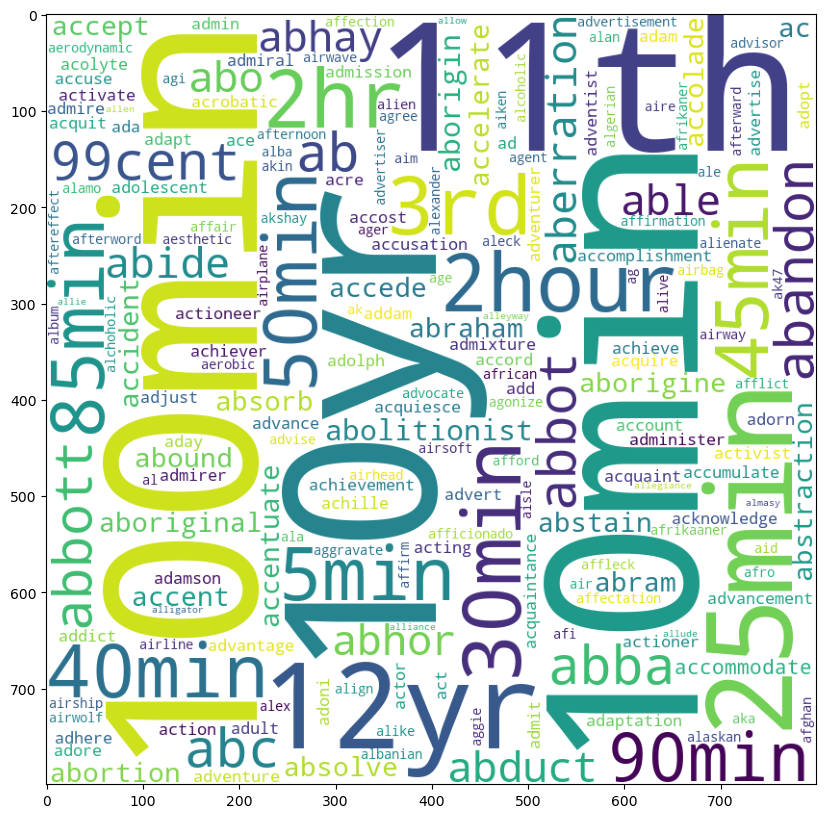

In [52]:
wordcloud=WordCloud(width=800,height=800,background_color='white',min_font_size=10)
wordcloud.generate(' '.join(bow_feature_names))
plt.figure(figsize=(10,10)) 
plt.imshow(wordcloud) 

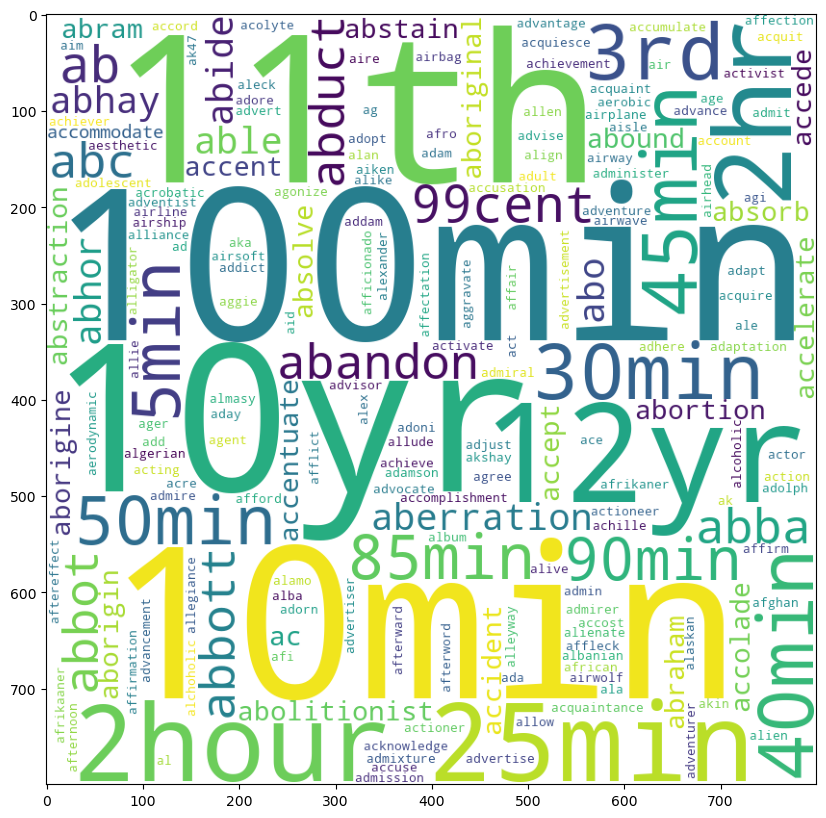

In [53]:
wordcloud=WordCloud(width=800,height=800,background_color='white',min_font_size=10)
wordcloud.generate(' '.join(tf_idf_feature_names))
plt.figure(figsize=(10,10)) 
plt.imshow(wordcloud) 

In [54]:
label_encoder=LabelEncoder()

In [55]:
y=label_encoder.fit_transform(df['sentiment'])

In [56]:
def model(x,y):
    df1=pd.DataFrame()
    pred=pd.DataFrame()
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1,shuffle=True)
    algorithms={
    'dt': DecisionTreeClassifier(),
    'lg': LogisticRegression(n_jobs=-1,warm_start=True,max_iter=1000,verbose=2),
    'rf': RandomForestClassifier(verbose=2,n_jobs=-1,warm_start=True),
    'ada': AdaBoostClassifier(),
    'bg': BaggingClassifier(verbose=2,n_jobs=-1,warm_start=True),
    'xgboost': XGBClassifier(n_jobs=-1),
    'catboost':CatBoostClassifier(verbose=2)
    }
    for key, alg in algorithms.items():
        alg.fit(xtrain, ytrain)
        pred[key]= alg.predict(xtest)
        train_pred = alg.predict(xtrain)
        df1.loc[key, 'test'] = accuracy_score(ytest, pred[key])
        df1.loc[key, 'train'] = accuracy_score(ytrain, train_pred)
    return df1,pred,xtrain,xtest,ytrain,ytest

In [57]:
acc,pred,xtrain,xtest,ytrain,ytest=model(df_bow,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   31.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.3s


building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   56.5s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:  1.8min remaining:  4.3min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  1.9min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=10)]: Using backend Loky

Learning rate set to 0.046848
0:	learn: 0.6788429	total: 1.22s	remaining: 20m 16s
2:	learn: 0.6550343	total: 3.09s	remaining: 17m 5s
4:	learn: 0.6361261	total: 4.84s	remaining: 16m 2s
6:	learn: 0.6203288	total: 6.65s	remaining: 15m 43s
8:	learn: 0.6082157	total: 8.47s	remaining: 15m 32s
10:	learn: 0.5974732	total: 10.4s	remaining: 15m 30s
12:	learn: 0.5878558	total: 12.1s	remaining: 15m 20s
14:	learn: 0.5800216	total: 13.9s	remaining: 15m 14s
16:	learn: 0.5729700	total: 15.6s	remaining: 15m 3s
18:	learn: 0.5660528	total: 17.5s	remaining: 15m 2s
20:	learn: 0.5594415	total: 19.3s	remaining: 15m
22:	learn: 0.5539011	total: 21.1s	remaining: 14m 57s
24:	learn: 0.5486341	total: 22.9s	remaining: 14m 54s
26:	learn: 0.5433470	total: 24.8s	remaining: 14m 53s
28:	learn: 0.5385034	total: 26.6s	remaining: 14m 52s
30:	learn: 0.5340632	total: 28.7s	remaining: 14m 58s
32:	learn: 0.5299708	total: 30.5s	remaining: 14m 54s
34:	learn: 0.5258834	total: 32.4s	remaining: 14m 52s
36:	learn: 0.5222293	total: 3

In [58]:
acc1,pred1,xtrain1,xtest1,ytrain1,ytest1=model(df_tf,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100building tree 13 of 100

building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.0s


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100building tree 64 of 100

building tree 65

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   49.9s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:  2.4min remaining:  5.7min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  2.6min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=10)]: Using backend Loky

Learning rate set to 0.046848
0:	learn: 0.6797041	total: 1.5s	remaining: 24m 57s
2:	learn: 0.6568337	total: 4.36s	remaining: 24m 8s
4:	learn: 0.6374631	total: 7.12s	remaining: 23m 36s
6:	learn: 0.6221896	total: 9.86s	remaining: 23m 18s
8:	learn: 0.6092745	total: 12.4s	remaining: 22m 50s
10:	learn: 0.5982653	total: 15s	remaining: 22m 31s
12:	learn: 0.5885086	total: 17.7s	remaining: 22m 20s
14:	learn: 0.5792299	total: 20.2s	remaining: 22m 9s
16:	learn: 0.5712385	total: 23s	remaining: 22m 9s
18:	learn: 0.5646752	total: 25.7s	remaining: 22m 7s
20:	learn: 0.5584720	total: 28.4s	remaining: 22m 6s
22:	learn: 0.5522774	total: 31.1s	remaining: 22m
24:	learn: 0.5470077	total: 34s	remaining: 22m 5s
26:	learn: 0.5420678	total: 36.8s	remaining: 22m 6s
28:	learn: 0.5374179	total: 39.3s	remaining: 21m 56s
30:	learn: 0.5327960	total: 41.7s	remaining: 21m 41s
32:	learn: 0.5286565	total: 44s	remaining: 21m 29s
34:	learn: 0.5243067	total: 46.7s	remaining: 21m 27s
36:	learn: 0.5204279	total: 49.4s	remaini

In [59]:
acc

,test,train
dt,0.722958,1.000000
lg,0.881815,0.996773
rf,0.846050,1.000000
ada,0.805513,0.806264
bg,0.779429,0.987870
xgboost,0.855529,0.937073
catboost,0.871126,0.918259


In [60]:
acc1

,test,train
dt,0.712202,1.000000
lg,0.889882,0.930648
rf,0.838319,1.000000
ada,0.806521,0.808482
bg,0.782857,0.988072
xgboost,0.853513,0.945025
catboost,0.869782,0.926614
